# Dataset creation

This notebook helps you load/generate 5 different datasets. If you just want to generate the datasets, press "Run all" in your jupyter notebook, wait a minute, and check your new directory `datasets`.

In [1]:
##Basic helper functions for this notebook. Run this first.
import os
import pickle as pkl


def create_folder(name):
    if not os.path.exists(name):
        os.makedirs(name)


datasets_path = 'datasets'
create_folder(datasets_path)

## IRIS

For IRIS we can use the dataset offered throught `scikit-learn`.      

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(data=np.concatenate((X, np.array([Y]).T), axis=1),
                  columns=feature_names + ['label'])

display(df.head())

df.to_csv(datasets_path + '/iris.csv')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Rain Dataset

This is a dataset from kaggle, see here https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The repository should contain a `rain.pq` file which is a highly compressed version of the dataset. The code below turns that file into a human readable .csv

In [3]:
df = pd.read_parquet('datasets/rain.pq')
df.to_csv('datasets/rain.csv')

# Ad Hoc Dataset

This dataset is taken from here: https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.datasets.ad_hoc_data.html

Can be perfectly solved using QSVM, as seen here: https://qiskit.org/documentation/machine-learning/tutorials/03_quantum_kernel.html

(10000, 2)


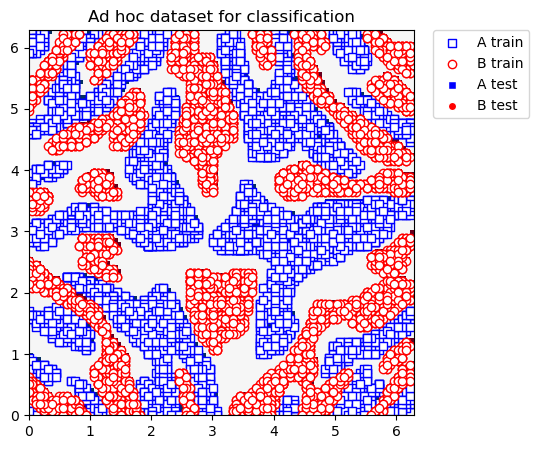

None

,feature_1,feature_2,label
0,0.376991,1.445133,0.0
1,2.450442,3.267256,0.0
2,3.455752,3.078761,0.0
3,5.592035,1.130973,0.0
4,4.272566,2.576106,0.0


In [7]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2  #number of qubits (dimension of the feature space, must be 2 or 3!, read the links)
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=5_000,
    test_size=0,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")
display(plt.show())

df = pd.DataFrame(data=np.concatenate((train_features, np.array([train_labels]).T), axis=1),
                  columns=['feature_1', 'feature_2', 'label'])
display(df.head())
df.to_csv(datasets_path + '/adhoc.csv')


# Vlds - Very Last Dataset

This dataset is built using `scikit` `Datasets.make_multilabel_classification`.

In [15]:
from sklearn import datasets

X, Y = datasets.make_multilabel_classification(n_samples=100, n_features=4, n_classes=1)
df = pd.DataFrame(data=np.concatenate((X, np.array([Y.flatten()]).T), axis=1),
                  columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label'])
display(df)
df.to_csv(datasets_path + '/vlds.csv')

,feature_1,feature_2,feature_3,feature_4,label
0,12.0,15.0,4.0,20.0,1.0
1,14.0,7.0,2.0,19.0,1.0
2,12.0,5.0,3.0,18.0,1.0
3,11.0,18.0,10.0,17.0,0.0
4,12.0,7.0,4.0,17.0,1.0
...,...,...,...,...,...
95,15.0,16.0,23.0,9.0,0.0
96,17.0,11.0,4.0,19.0,1.0
97,19.0,10.0,4.0,19.0,1.0
98,10.0,9.0,11.0,11.0,0.0


# Custom Dataset  

In [8]:
from numpy.random import default_rng

'''
Custom data set generator.
Points inside of the square.
Points ouside of the squre.
center - centers of two concetric squres.
Two feature data point.
numberPoints - number of generated points
x is choosen, y deppending on x has two cases.
'''


def custom_dataset_generator(numberPoints, center, innerR, outerR, custom_fraction_inside):
    line1 = lambda x: (x + center[1] - center[0])
    line2 = lambda x: (-x + center[1] + center[0])
    innerX = [center[0] - innerR, center[0] + innerR]
    innerY = [center[1] - innerR, center[1] + innerR]

    outerYTop = [center[1] + innerR, center[1] + outerR]
    outerYBot = [center[1] - outerR, center[1] - innerR]
    outerX = [center[0] - outerR, center[0] + outerR]
    outerY = [center[1] - outerR, center[1] + outerR]

    x = np.array([])
    y = np.array([])
    l = np.array([])

    rng = default_rng()

    nPointInside = numberPoints * custom_fraction_inside
    nPointOutside = numberPoints - nPointInside
    print(y)
    for i in range(int(nPointInside)):
        rn = rng.uniform(1, 4)  # by setting 0, will include center square
        l = np.append(l, 0)
        if int(rn) == 0:  #put in center
            x_rn = rng.uniform(innerX[0], innerX[1])
            x = np.append(x, x_rn)
            y = np.append(y, rng.uniform(innerY[0], innerY[1]))
        elif int(rn) == 1:  #put on the first line
            x_rn = rng.uniform(outerX[0], outerX[1])
            x = np.append(x, x_rn)
            y = np.append(y, line1(x_rn))
        else:  #put on the second line
            x_rn = rng.uniform(outerX[0], outerX[1])
            x = np.append(x, x_rn)
            y = np.append(y, line2(x_rn))

    for i in range(int(nPointOutside)):
        x = np.append(x, rng.uniform(outerX[0], outerX[1]))
        if x[-1] < innerX[1] and x[-1] > innerX[0]:
            if rng.uniform() > 0.5:
                y = np.append(y, rng.uniform(outerYTop[0], outerYTop[1]))
            else:
                y = np.append(y, rng.uniform(outerYBot[0], outerYBot[1]))
        else:
            y = np.append(y, rng.uniform(outerY[0], outerY[1]))
        l = np.append(l, 1)
    return np.stack((x, y), axis=1), np.uint(l)

In [11]:
X, Y = custom_dataset_generator(100, (3, 3), 0.1, 0.5, 0.3)
df = pd.DataFrame(data=np.concatenate((X, np.array([Y]).T), axis=1),
                  columns=['feature_1', 'feature_2', 'label'])

display(df)

df.to_csv(datasets_path + '/custom_dataset.csv')


[]


,feature_1,feature_2,label
0,3.109987,2.890013,0.0
1,3.038349,2.961651,0.0
2,3.133267,2.866733,0.0
3,3.050946,3.050946,0.0
4,2.582848,2.582848,0.0
...,...,...,...
95,3.282178,2.847085,1.0
96,3.096136,3.177444,1.0
97,2.638572,3.424275,1.0
98,3.059952,2.550377,1.0
